<a href="https://colab.research.google.com/github/fadhilraisw/project-employee-burnout-analysis/blob/main/project_employee_burnout_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blurredmachine/are-your-employees-burning-out")

print("Path to dataset files:", path)

100%|██████████| 425k/425k [00:00<00:00, 29.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blurredmachine/are-your-employees-burning-out/versions/1


In [2]:
import pandas as pd
import os

In [3]:
# 'path' ini variabel yang kamu dapat dari output kagglehub sebelumnya
print("Alamat Folder:", path)

# Kita minta OS untuk melihat daftar isi (list directory) dari folder itu
isi_folder = os.listdir(path)

print("Isi di dalam folder:", isi_folder)

Alamat Folder: /root/.cache/kagglehub/datasets/blurredmachine/are-your-employees-burning-out/versions/1
Isi di dalam folder: ['train.csv', 'sample_submission.csv', 'test.csv']


In [4]:
# Ambil nama file pertama yang kita temukan tadi (index ke-0)
nama_file_csv = isi_folder[0]

# Gabungkan Path Folder + Nama File secara otomatis
full_path = os.path.join(path, nama_file_csv)

print("Alamat Lengkap File:", full_path)

Alamat Lengkap File: /root/.cache/kagglehub/datasets/blurredmachine/are-your-employees-burning-out/versions/1/train.csv


In [5]:
# pd.read_csv artinya: "Hei Pandas, tolong baca file format CSV di alamat ini..."
# df artinya: "DataFrame". Ini istilah standar untuk tabel di dalam memori Python.
df = pd.read_csv(full_path)

# Tampilkan 5 baris teratas saja biar layar gak penuh
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [6]:
# 1. Cek Dimensi (Berapa besar musuh kita?)
# Outputnya akan berupa (Jumlah Baris, Jumlah Kolom)
print("Ukuran Data:", df.shape)

print("\n" + "="*30 + "\n") # Pembatas biar rapi

# 2. Cek "Jeroan" Data (Tipe data dan Memori)
# Ini adalah perintah paling penting bagi Data Analyst di tahap awal
df.info()

Ukuran Data: (22750, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [7]:
# data cleaning

# 1. Cek jumlah data kosong per kolom sebelum dibersihkan
print("Jumlah kosong sebelum drop :")
print(df.isnull().sum())


# 2. hapus semua baris yang mengandung minimal satu data kosong (NaN)
# kita simpan di variabel baru ' df_clean' biar data asli 'df' tidak hilang (backup)
df_clean = df.dropna()
print ("\n" + "="*30 + "\n")


# 3. cek apakah sudah bersih
print("Jumlah kososng SETELAH drop : ")
print(df_clean.isnull().sum())


# 4. cek sisa data kita tinggal berapa baris
print ("\nSisa data sekarang : ",df_clean.shape)

Jumlah kosong sebelum drop :
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


Jumlah kososng SETELAH drop : 
Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

Sisa data sekarang :  (18590, 9)


In [8]:
# ubah tipe data date of join dari object ke datetime

df_clean ['Date of Joining'] = pd. to_datetime(df_clean['Date of Joining'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           18590 non-null  object        
 1   Date of Joining       18590 non-null  datetime64[ns]
 2   Gender                18590 non-null  object        
 3   Company Type          18590 non-null  object        
 4   WFH Setup Available   18590 non-null  object        
 5   Designation           18590 non-null  float64       
 6   Resource Allocation   18590 non-null  float64       
 7   Mental Fatigue Score  18590 non-null  float64       
 8   Burn Rate             18590 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.4+ MB


/tmp/ipython-input-3281382449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean ['Date of Joining'] = pd. to_datetime(df_clean['Date of Joining'])


In [9]:
# cek korelasi

# 1. pilih hanya kolom yang isinya angka (numerik)
df_angka = df_clean.select_dtypes(include=['number'])

# 2. hitung korelasinya (siapa berhubungan dengan siapa)
tabel_korelasi = df_angka.corr()

# 3. Kita fokus lihat hubungan kolom lain terhadap "Burn Rate"
# Kita urutkan dari yang paling berpengaruh (ascending = False)
hasil_analisa = tabel_korelasi['Burn Rate'].sort_values(ascending=False)

print("--- Faktor Penentu Burnout ---")
print(hasil_analisa)

--- Faktor Penentu Burnout ---
Burn Rate               1.000000
Mental Fatigue Score    0.944389
Resource Allocation     0.855005
Designation             0.736412
Name: Burn Rate, dtype: float64


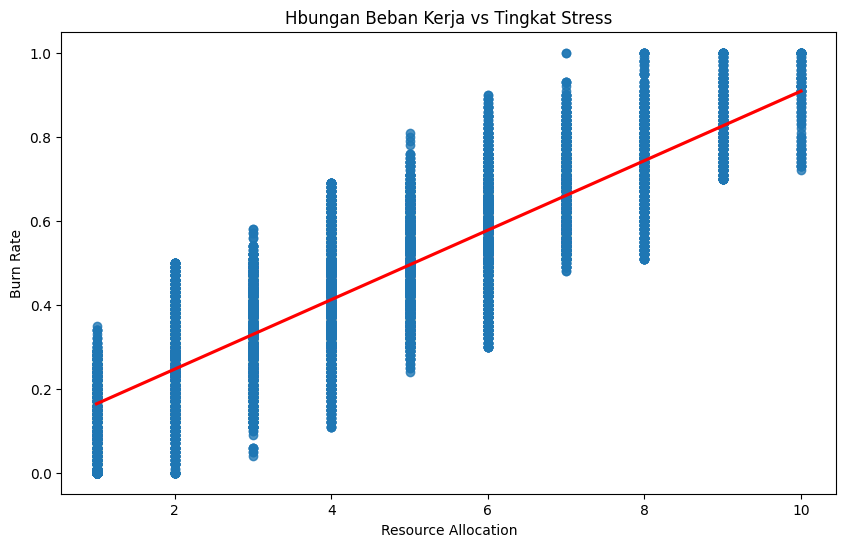

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#mengatur ukuran gambar biar lega
plt.figure(figsize=(10, 6))

# membuat scatter plot dengan garis regresi
# x = penyebab (Jam Kerja )
# y = Akibat (Burnout)
sns.regplot(data=df_clean, x = 'Resource Allocation', y = 'Burn Rate', line_kws={"color": "red"})

# memberi judul
plt.title('Hubungan Beban Kerja vs Tingkat Stress')
plt.show()

--- Laporan Status Karyawan ---
Status
Low             10826
Moderate         5693
High Burnout     2071
Name: count, dtype: int64


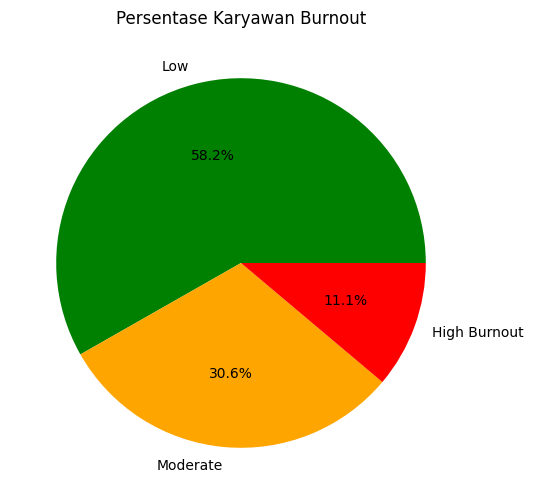

In [11]:
#feature engineering (membuat kategori)

# Tambahkan .copy() agar df_clean menjadi entitas MANDIRI (bukan bayangan df lama)
df_clean = df.dropna().copy()

# 1. Kita bikin dulu fungsi logikanya (semacam rumus excel if)
def tentukan_status(nilai):
  if nilai >= 0.7 :
    return "High Burnout"
  elif nilai >= 0.5:
    return "Moderate"
  else :
    return "Low"

# 2. Terapkan fiungsi itu ke seluruh kolom 'Burn Rate'
#.apply() itu ibarat kita suruh python : Tolong jalanin fungsi diatas untuk setiap baris data
df_clean['Status'] = df_clean['Burn Rate'].apply(tentukan_status)

# 3. Kita hitung berapa jumlah karyawan di tiap kategori
hitung_status = df_clean['Status'].value_counts()

print("--- Laporan Status Karyawan ---")
print(hitung_status)

#4. Visualisasi Pie chart biar kebayang
plt.figure(figsize=(6, 6))
plt.pie (hitung_status, labels=hitung_status.index, autopct='%1.1f%%', colors= ['green', 'orange', 'red' ])
plt.title('Persentase Karyawan Burnout')
plt.show()

In [12]:
#machine learning

# kita pilih kolom penyebab (X) dan kolom akibat (y)

# X (Huruf Besar): Melambangkan Matriks (Tabel 2 Dimensi). Karena isinya punya banyak baris dan banyak kolom (Resource Allocation, Designation, dll).
# y (Huruf Kecil): Melambangkan Vektor (Deret 1 Dimensi). Karena isinya cuma satu baris panjang ke bawah (Burn Rate saja).

# perhatikan : X pakai kurung siku dua kali [['...']] karena dia adalah Daftar Kolom(Tabel)
X = df_clean[['Resource Allocation', 'Designation']]

# y pakai kurung siku satu kali karena dia cuma satu kolom (Deret angka)
y = df_clean['Burn Rate']

print("Bentuk X: ", X.shape)
print("Bentuk y: ", y.shape)

Bentuk X:  (18590, 2)
Bentuk y:  (18590,)


In [13]:
#kotak perkakas atau library machine learning yang standar industri
from sklearn.model_selection import train_test_split

#membagi data secara acak
# test_size=0.2 artinya 20% data disisihkan buat ujian
# random_state=42 adalah kode rahasia untuk ngacak
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah Data Buat Belajar (Train): ", X_train.shape)
print("Jumlah Data Buat Belajar (Test): ", X_test.shape)


Jumlah Data Buat Belajar (Train):  (14872, 2)
Jumlah Data Buat Belajar (Test):  (3718, 2)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#1. panggil otak kosongnya
model = LinearRegression()

#2 Training dengan data latihan (hei tolongin cari pola antara data train x dan data train y)
model.fit(X_train, y_train)
print("komputer telah selesai belajar!")

#3. Testing data dengan menebak dan analisa sesuai data yang belum pernah ia pelajari
# hei coba tebak berapa burn rate sesuai data baru ini (X_test)
prediksi = model.predict(X_test)

#4. Evaluasi : Seberapa Jago Dia ?
# menggunakan MAE (Mean Absolute Error) atau rata rata melesetnya
# Rumus : |Jawaban Asli - Tebakan Komputer|
error_rata2 = mean_absolute_error(y_test, prediksi)

print(f"\nRata Rata Tebakan Meleset Sebesar : {error_rata2:.4f}")
print("Contoh Tebakan Vs Asli : ")

#tampilkan 5 data pertama untuk perbandingan langsung

comparison = pd.DataFrame({'Tebakan Komputer': prediksi[:5], 'Kunci Jawaban': y_test[:5].values})
display(comparison)



komputer telah selesai belajar!

Rata Rata Tebakan Meleset Sebesar : 0.0809
Contoh Tebakan Vs Asli : 


,Tebakan Komputer,Kunci Jawaban
0,0.245930,0.18
1,0.411196,0.29
2,0.400969,0.36
3,0.411196,0.48
4,0.829474,0.79


In [16]:
# kita coba menambahkan data baru dan kita lihat efeknya apakah akan menambah akurasi atau menurunkan akurasi
# 1. Kita persiapkan data baru dengan mengambil konsep kolom numerik untuk gender dan wfh/wfo serta teks untuk company type
# menggunakan one hot encoding sehingga kita bisa memproyeksikan nilai matematisnya (Bayangkan kita punya tombol lampu. Kita ubah kolom Gender menjadi dua tombol terpisah:)
# kita gunakan pd.get_dummies() -> merupakan mantra ajaib untuk membuat one hot encoding
df_lengkap = pd.get_dummies(df_clean[['Resource Allocation', 'Designation', 'Gender', 'Company Type', 'WFH Setup Available']], drop_first=True)

#fitur baru setelah encoding
print("Fitur Baru Setelah Encoding : ")
print(df_lengkap.columns.tolist())

# 2. Split Data Ulang
# X baru (df_lengkap), y tetap sama (Burn Rate)
X_train_baru, X_test_baru, y_train_baru, y_test_baru = train_test_split(df_lengkap, y, test_size=0.2, random_state=42)

#3. latih model versi 2
model_v2 = LinearRegression()
model_v2.fit(X_train_baru, y_train_baru)

# 4. evaluasi
prediksi_v2 = model_v2.predict(X_test_baru)
error_v2 = mean_absolute_error(y_test_baru, prediksi_v2)

print("\n" + "=" * 40)
print(f"Error Model Lama (hanya angka) : 0.0809")
print(f"Error Model Baru (Plus Gender & WFH) : {error_v2:.4f}")
print("=" * 40)

if error_v2 < 0.0809:
  print("menambahkan data gender dan wfh membuat prediksi lebih akurat ! ✅")
else :
  print("menambahkan data gender dan wfh tidak terlalu efektif ❌")







Fitur Baru Setelah Encoding : 
['Resource Allocation', 'Designation', 'Gender_Male', 'Company Type_Service', 'WFH Setup Available_Yes']

Error Model Lama (hanya angka) : 0.0809
Error Model Baru (Plus Gender & WFH) : 0.0799
menambahkan data gender dan wfh membuat prediksi lebih akurat ! ✅
